# cfDNA simulations 

Assess perform of our EM algorithm in pure simulated data 

# Functions

## Imports

In [277]:
import numpy as np 
import pandas as pd 
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import pickle as pkl
from sklearn.metrics import mean_squared_error
from math import sqrt

## Load EM results

In [147]:
def load_pickles(directory, parameter):
    """
    output from EM is a pickle file of estimate and true simulation values 
    load these pickles into dataframe 
    """
    
    est_files = glob.glob(directory + "/*" + parameter + "_est.pkl")  # estimates from EM 
    df = pd.DataFrame(columns={"estimate", "individual", "truth", "tissue", "iteration"})  # intialize dataframe

    
    for file in range(len(est_files)):  # iterate over all random restarts in the directory 
        
        est_file = est_files[file]  # get all estimates 
        true_file = est_file.replace("est", "true")  # true simulations 
        
        true = pkl.load(open(true_file, "rb"))
        est = pkl.load(open(est_file, "rb"))
        
        for individual, pair in enumerate(zip(est, true)): 
            e, t = pair[0], pair[1]
            
            for i in range(len(t)):  # add each estimate for each tissue to dataframe 
                df = df.append({"estimate":e[i], "individual":individual, "truth":t[i], 
                            "tissue":i, "iteration":file}, ignore_index=True)
        
    return df


In [148]:
def load_gamma_corr(directory, parameter):
    """
    calculate the correlation between the true and estimated EM output from the pickle files 
    """
    
    est_files = glob.glob(directory + "/*" + parameter + "_est.pkl")
    df = pd.DataFrame(columns={"tissue", "correlation"})

    
    for file in range(len(est_files)):
        # load the files
        est_file = est_files[file]
        true_file = est_file.replace("est", "true")
        
        true = pkl.load(open(true_file, "rb"))
        est = pkl.load(open(est_file, "rb"))
        
        for t in range(est.shape[0]): 
            corr = np.corrcoef(true[t, :], est[t, :])[0][1]  # calculate the correlation 
            df = df.append({"tissue":str(t), "correlation":corr}, ignore_index=True)
    
    return df

# Pure Simulations

## Uniform Random Varying Depth 

Generate true methylation proportions from a random uniform. Vary the read depth of the input and reference data.

Fixed: 1 person and 10 tissues

### 1x

In [558]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_one_person_1x/"
one_per_1x = load_pickles(directory, "alpha")
gamma_corr_1x = load_gamma_corr(directory, "gamma")

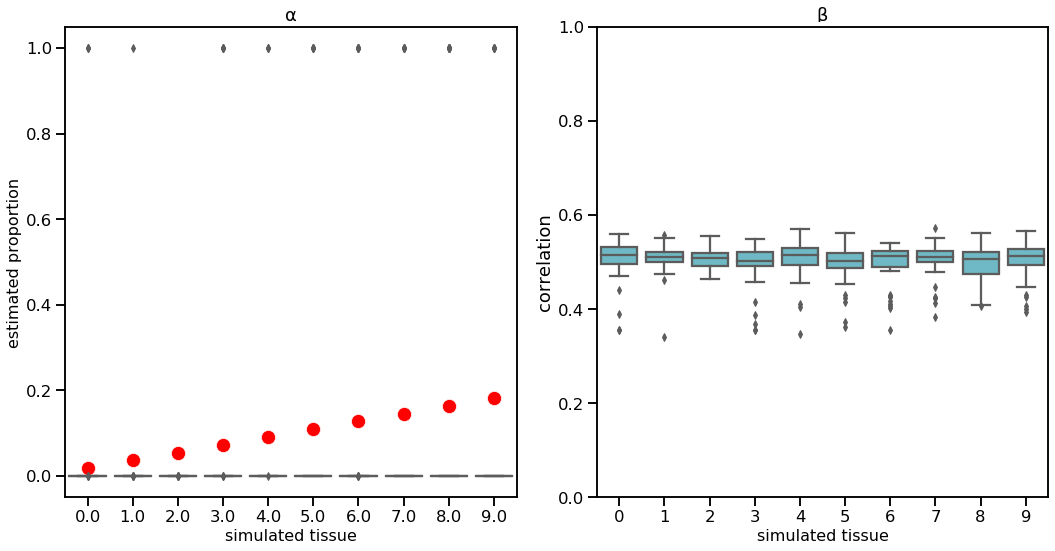

In [559]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,8))

sns.set_context("talk")

sns.boxplot("tissue", "estimate", data = one_per_1x, color="#61c2d3", ax=ax1)
sns.scatterplot("tissue", "truth", data = one_per_1x, color="red", s=200, ax=ax1)
sns.boxplot("tissue", "correlation", data=gamma_corr_1x, color="#61c2d3", ax=ax2)

ax1.set_xlabel("simulated tissue", fontsize=16)
ax2.set_xlabel("simulated tissue", fontsize=16)
ax1.set_ylabel("estimated proportion", fontsize=16)
ax1.set_title("α")
ax2.set_title("β")

ax2.set_ylim(0, 1)

fig.tight_layout()


### 10x

In [560]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_one_person_10x/"
one_per_10x = load_pickles(directory, "alpha")
gamma_corr_10x = load_gamma_corr(directory, "gamma")

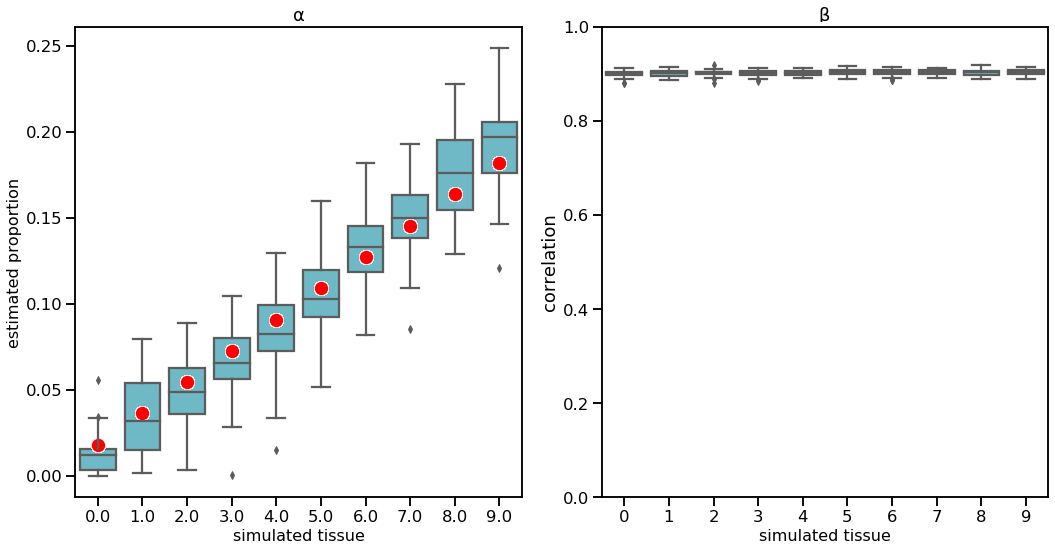

In [561]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,8))

sns.set_context("talk")

sns.boxplot("tissue", "estimate", data = one_per_10x, color="#61c2d3", ax=ax1)
sns.scatterplot("tissue", "truth", data = one_per_10x, color="red", s=200, ax=ax1)
sns.boxplot("tissue", "correlation", data=gamma_corr_10x, color="#61c2d3", ax=ax2)

ax1.set_xlabel("simulated tissue", fontsize=16)
ax2.set_xlabel("simulated tissue", fontsize=16)
ax1.set_ylabel("estimated proportion", fontsize=16)
ax1.set_title("α")
ax2.set_title("β")

ax2.set_ylim(0, 1)

fig.tight_layout()


### 100x

In [562]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_one_person_100x/"
one_per_100x = load_pickles(directory, "alpha")
gamma_corr_100x = load_gamma_corr(directory, "gamma")

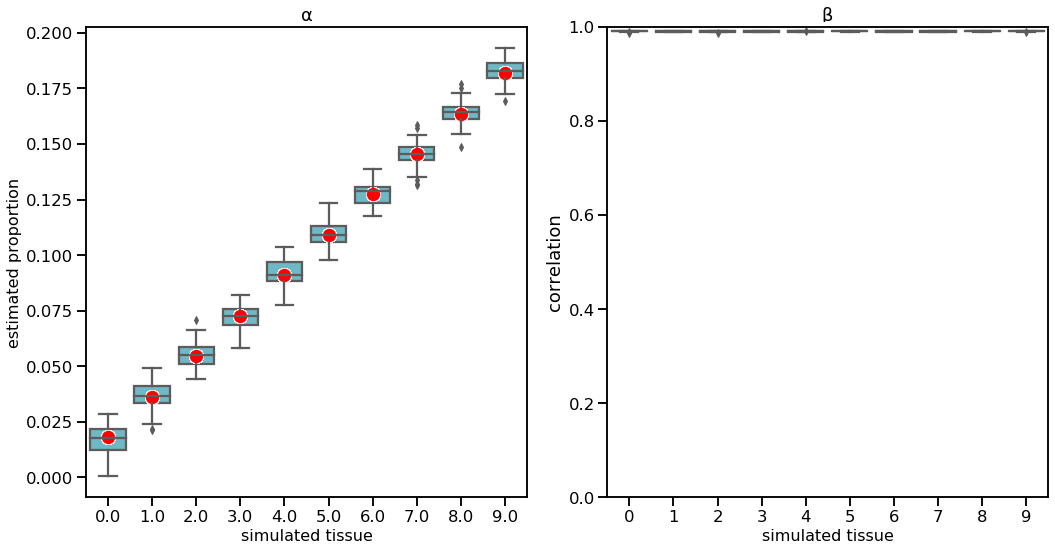

In [563]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,8))

sns.set_context("talk")

sns.boxplot("tissue", "estimate", data = one_per_100x, color="#61c2d3", ax=ax1)
sns.scatterplot("tissue", "truth", data = one_per_100x, color="red", s=200, ax=ax1)
sns.boxplot("tissue", "correlation", data=gamma_corr_100x, color="#61c2d3", ax=ax2)

ax1.set_xlabel("simulated tissue", fontsize=16)
ax2.set_xlabel("simulated tissue", fontsize=16)
ax1.set_ylabel("estimated proportion", fontsize=16)
ax1.set_title("α")
ax2.set_title("β")

ax2.set_ylim(0, 1)

fig.tight_layout()


### 1000x

In [564]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_one_person_1000x/"
one_per_1000x = load_pickles(directory, "alpha")
gamma_corr_1000x = load_gamma_corr(directory, "gamma")

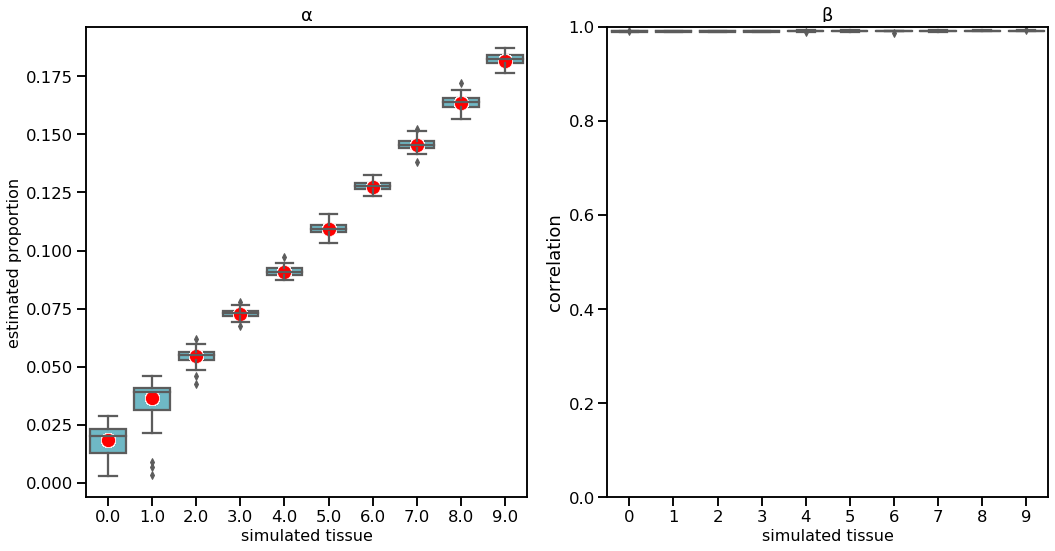

In [565]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,8))

sns.set_context("talk")

sns.boxplot("tissue", "estimate", data = one_per_1000x, color="#61c2d3", ax=ax1)
sns.scatterplot("tissue", "truth", data = one_per_1000x, color="red", s=200, ax=ax1)
sns.boxplot("tissue", "correlation", data=gamma_corr_1000x, color="#61c2d3", ax=ax2)

ax1.set_xlabel("simulated tissue", fontsize=16)
ax2.set_xlabel("simulated tissue", fontsize=16)
ax1.set_ylabel("estimated proportion", fontsize=16)
ax1.set_title("α")
ax2.set_title("β")

ax2.set_ylim(0, 1)

fig.tight_layout()


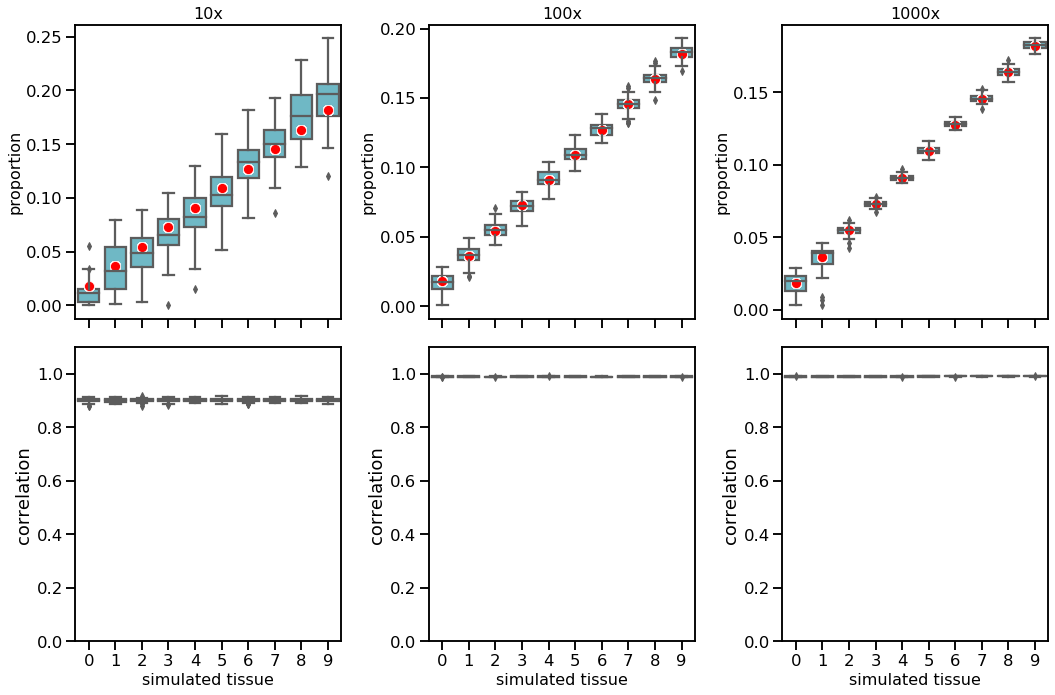

In [566]:
fig, ax = plt.subplots(ncols=3, nrows=2, sharex=True, figsize=(15,10))

sns.set_context("talk")

sns.boxplot("tissue", "estimate", data = one_per_10x, color="#61c2d3", ax=ax[0,0])
sns.scatterplot("tissue", "truth", data = one_per_10x, color="red", s=100, ax=ax[0,0])
sns.boxplot("tissue", "correlation", data=gamma_corr_10x, color="#61c2d3", ax=ax[1,0])

sns.boxplot("tissue", "estimate", data = one_per_100x, color="#61c2d3", ax=ax[0,1])
sns.scatterplot("tissue", "truth", data = one_per_100x, color="red", s=100, ax=ax[0,1])
sns.boxplot("tissue", "correlation", data=gamma_corr_100x, color="#61c2d3", ax=ax[1,1])

sns.boxplot("tissue", "estimate", data = one_per_1000x, color="#61c2d3", ax=ax[0,2])
sns.scatterplot("tissue", "truth", data = one_per_1000x, color="red", s=100, ax=ax[0,2])
sns.boxplot("tissue", "correlation", data=gamma_corr_1000x, color="#61c2d3", ax=ax[1,2])

ax[1, 0].set_xlabel("simulated tissue", fontsize=16)
ax[1, 1].set_xlabel("simulated tissue", fontsize=16)
ax[1, 2].set_xlabel("simulated tissue", fontsize=16)

ax[0, 0].set_ylabel("proportion", fontsize=16)
ax[0, 1].set_ylabel("proportion", fontsize=16)
ax[0, 2].set_ylabel("proportion", fontsize=16)

ax[1, 0].set_ylim(0, 1.1)
ax[1, 1].set_ylim(0, 1.1)
ax[1, 2].set_ylim(0, 1.1)

ax[0, 0].set_title("10x", fontsize=16)
ax[0, 1].set_title("100x", fontsize=16)
ax[0, 2].set_title("1000x", fontsize=16)


fig.tight_layout()


## Uniform Random Varying Depth and Fixed Tissue Proportion 

Generate true methylation proportions from a random uniform. Fix one tissue of interest at (0, 0.01, 0.1, 1,  5, 50, 100) percents. Let other tissues be random so that they sum to one. Vary the depth. 

### 10 people, 1000 sites, variable depth

In [149]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_1x/"
vary_perc_1x = load_gamma_corr(directory, "alpha")

directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_10x/"
vary_perc_10x = load_gamma_corr(directory, "alpha")

directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_100x/"
vary_perc_100x = load_gamma_corr(directory, "alpha")

directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_1000x/"
vary_perc_1000x = load_gamma_corr(directory, "alpha")

In [150]:
percent_names = {"0":0.0, "1":0.001, "2":0.01, "3":0.1, "4":1, "5":5, "6":10, "7":20, "8":50, "9":100}

vary_perc_1x = vary_perc_1x.replace({"tissue": percent_names})
vary_perc_10x = vary_perc_10x.replace({"tissue": percent_names})
vary_perc_100x = vary_perc_100x.replace({"tissue": percent_names})
vary_perc_1000x = vary_perc_1000x.replace({"tissue": percent_names})

### 10 people, 100 sites, variable depth

In [151]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_1x_100/"
vary_perc_1x_100 = load_gamma_corr(directory, "alpha")

directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_10x_100/"
vary_perc_10x_100 = load_gamma_corr(directory, "alpha")

directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_100x_100/"
vary_perc_100x_100 = load_gamma_corr(directory, "alpha")

directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_1000x_100/"
vary_perc_1000x_100 = load_gamma_corr(directory, "alpha")

In [152]:
vary_perc_1x_100 = vary_perc_1x_100.replace({"tissue": percent_names})
vary_perc_10x_100 = vary_perc_10x_100.replace({"tissue": percent_names})
vary_perc_100x_100 = vary_perc_100x_100.replace({"tissue": percent_names})
vary_perc_1000x_100 = vary_perc_1000x_100.replace({"tissue": percent_names})

### 10 people, 10000 sites, variable depth

In [153]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_1x_10000/"
vary_perc_1x_10000 = load_gamma_corr(directory, "alpha")

directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_10x_10000/"
vary_perc_10x_10000 = load_gamma_corr(directory, "alpha")

directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_100x_10000/"
vary_perc_100x_10000 = load_gamma_corr(directory, "alpha")

directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_1000x_10000/"
vary_perc_1000x_10000 = load_gamma_corr(directory, "alpha")

In [154]:
vary_perc_1x_10000 = vary_perc_1x_10000.replace({"tissue": percent_names})
vary_perc_10x_10000 = vary_perc_10x_10000.replace({"tissue": percent_names})
vary_perc_100x_10000 = vary_perc_100x_10000.replace({"tissue": percent_names})
vary_perc_1000x_10000 = vary_perc_1000x_10000.replace({"tissue": percent_names})

### all sites together 

subset to informative values

In [161]:
vary_perc_1x_10000_subset = vary_perc_1x_10000[vary_perc_1x_10000['tissue'].isin([0, 0.001, 50, 100])]
vary_perc_10x_10000_subset = vary_perc_10x_10000[vary_perc_10x_10000['tissue'].isin([0, 0.001, 50, 100])]
vary_perc_100x_10000_subset = vary_perc_100x_10000[vary_perc_100x_10000['tissue'].isin([0, 0.001, 50, 100])]
vary_perc_1000x_10000_subset = vary_perc_1000x_10000[vary_perc_1000x_10000['tissue'].isin([0, 0.001, 50, 100])]

In [162]:
vary_perc_1x_100_subset = vary_perc_1x_100[vary_perc_1x_100['tissue'].isin([0, 0.001, 50, 100])]
vary_perc_10x_100_subset = vary_perc_10x_100[vary_perc_10x_100['tissue'].isin([0, 0.001, 50, 100])]
vary_perc_100x_100_subset = vary_perc_100x_100[vary_perc_100x_100['tissue'].isin([0, 0.001, 50, 100])]
vary_perc_1000x_100_subset = vary_perc_1000x_100[vary_perc_1000x_100['tissue'].isin([0, 0.001, 50, 100])]

In [163]:
vary_perc_1x_subset = vary_perc_1x[vary_perc_1x['tissue'].isin([0, 0.001, 50, 100])]
vary_perc_10x_subset = vary_perc_10x[vary_perc_10x['tissue'].isin([0, 0.001, 50, 100])]
vary_perc_100x_subset = vary_perc_100x[vary_perc_100x['tissue'].isin([0, 0.001, 50, 100])]
vary_perc_1000x_subset = vary_perc_100x[vary_perc_1000x['tissue'].isin([0, 0.001, 50, 100])]

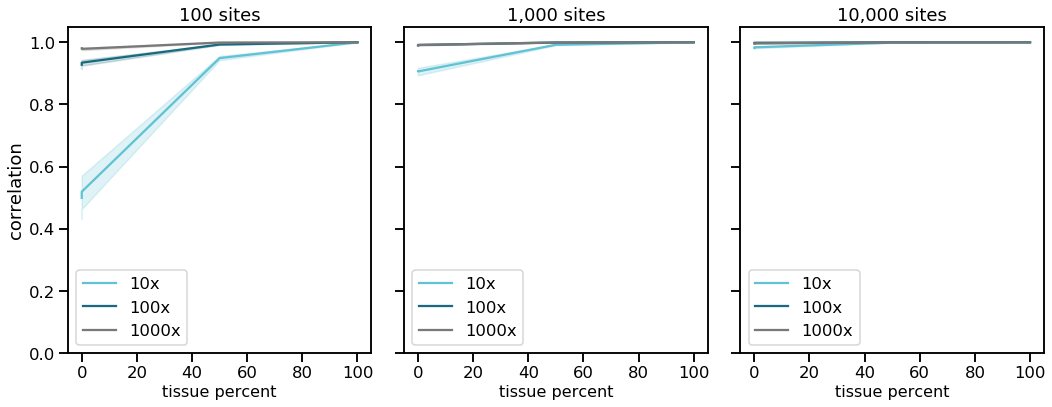

In [164]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,6))

sns.set_context("talk")

sns.lineplot(x="tissue", y="correlation", data=vary_perc_10x_100_subset, label="10x", color="#61c2d3", ax=ax1)
sns.lineplot(x="tissue", y="correlation", data=vary_perc_100x_100_subset, label="100x", color="#196a7d", ax=ax1)
sns.lineplot(x="tissue", y="correlation", data=vary_perc_1000x_100_subset, label="1000x", color="#787878", ax=ax1)

sns.lineplot(x="tissue", y="correlation", data=vary_perc_10x_subset, label="10x", color="#61c2d3", ax=ax2)
sns.lineplot(x="tissue", y="correlation", data=vary_perc_100x_subset, label="100x", color="#196a7d", ax=ax2)
sns.lineplot(x="tissue", y="correlation", data=vary_perc_1000x_subset, label="1000x", color="#787878", ax=ax2)

sns.lineplot(x="tissue", y="correlation", data=vary_perc_10x_10000_subset, label="10x", color="#61c2d3", ax=ax3)
sns.lineplot(x="tissue", y="correlation", data=vary_perc_100x_10000_subset, label="100x", color="#196a7d", ax=ax3)
sns.lineplot(x="tissue", y="correlation", data=vary_perc_1000x_10000_subset, label="1000x", color="#787878", ax=ax3)

# ax1.set(xscale="log")
# ax2.set(xscale="log")
# ax3.set(xscale="log")

ax1.set_xlabel("tissue percent", fontsize=16)
ax2.set_xlabel("tissue percent", fontsize=16)
ax3.set_xlabel("tissue percent", fontsize=16)

ax1.set_title("100 sites")
ax2.set_title("1,000 sites")
ax3.set_title("10,000 sites")


ax1.set_ylim(0, 1.05)

fig.tight_layout()


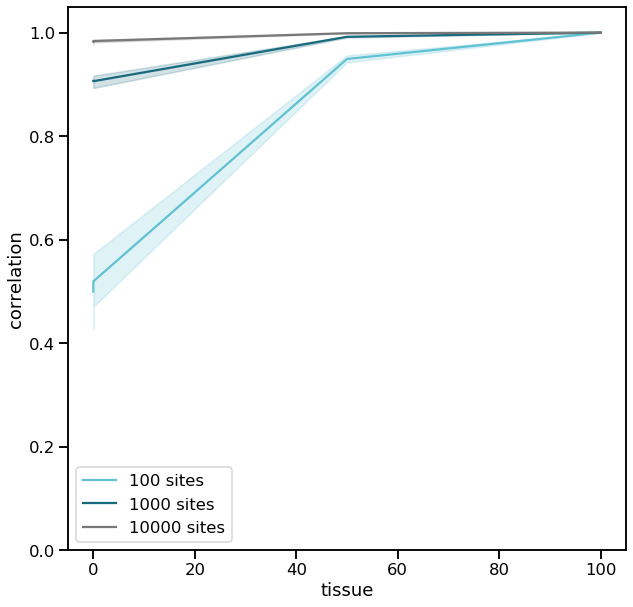

In [165]:
plt.figure(figsize=(10, 10))

sns.set_context("talk")

sns.lineplot(x="tissue", y="correlation", data=vary_perc_10x_100_subset, label="100 sites", color="#61c2d3")
sns.lineplot(x="tissue", y="correlation", data=vary_perc_10x_subset, label="1000 sites", color="#196a7d")
sns.lineplot(x="tissue", y="correlation", data=vary_perc_10x_10000_subset, label="10000 sites", color="#787878")

plt.ylim(0, 1.05)

fig.tight_layout()


In [240]:
rare_subset_10x = vary_perc_10x[vary_perc_10x.tissue == 0.001 ]
rare_subset_100x = vary_perc_100x[vary_perc_100x.tissue == 0.001 ]
rare_subset_1000x = vary_perc_1000x[vary_perc_1000x.tissue == 0.001 ]

rare_subset_10x["depth"] = 10 
rare_subset_100x["depth"] = 100 
rare_subset_1000x["depth"] = 1000 

rare_subset = pd.concat([rare_subset_10x, rare_subset_100x, rare_subset_1000x])


/Users/christacaggiano/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/christacaggiano/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/christacaggiano/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

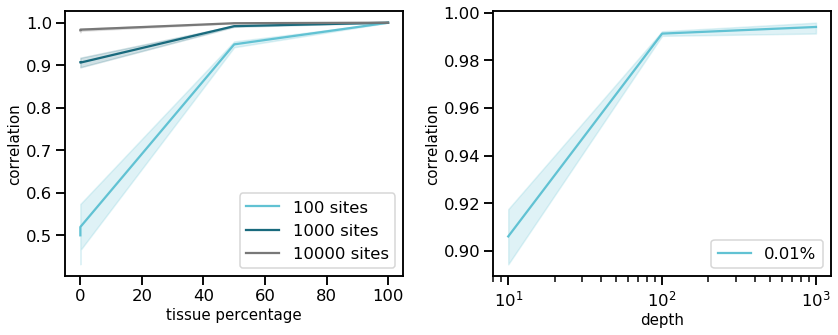

In [305]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(12,5))


sns.set_context("talk")

sns.lineplot(x="tissue", y="correlation", data=vary_perc_10x_100_subset, label="100 sites", color="#61c2d3", ax=ax1)
sns.lineplot(x="tissue", y="correlation", data=vary_perc_10x_subset, label="1000 sites", color="#196a7d", ax=ax1)
sns.lineplot(x="tissue", y="correlation", data=vary_perc_10x_10000_subset, label="10000 sites", color="#787878", ax=ax1)

sns.lineplot(x="depth", y="correlation", data=rare_subset, color="#61c2d3", label="0.01%", ax=ax2)

ax1.set_ylabel("correlation", fontsize=15)
ax2.set_ylabel("correlation", fontsize=15)

ax1.set_xlabel("tissue percentage", fontsize=15)
ax2.set_xlabel("depth", fontsize=15)

ax2.set(xscale="log")
ax2.legend(loc='lower right')

fig.tight_layout()


### 10 people, variable sites, variable depth, 50 other tissues

#### 1000 sites

In [587]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_10x_50t/"
vary_perc_10x_50t = load_gamma_corr(directory, "alpha")
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_100x_50t/"
vary_perc_100x_50t = load_gamma_corr(directory, "alpha")
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_1000x_50t/"
vary_perc_1000x_50t = load_gamma_corr(directory, "alpha")

vary_perc_10x_50t = vary_perc_10x_50t.replace({"tissue": percent_names})
vary_perc_100x_50t = vary_perc_100x_50t.replace({"tissue": percent_names})
vary_perc_1000x_50t = vary_perc_1000x_50t.replace({"tissue": percent_names})

#### 100 sites

In [588]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_10x_100_50t/"
vary_perc_10x_100_50t = load_gamma_corr(directory, "alpha")
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_100x_100_50t/"
vary_perc_100x_100_50t = load_gamma_corr(directory, "alpha")
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_1000x_100_50t/"
vary_perc_1000x_100_50t = load_gamma_corr(directory, "alpha")

vary_perc_10x_100_50t = vary_perc_10x_100_50t.replace({"tissue": percent_names})
vary_perc_100x_100_50t = vary_perc_100x_100_50t.replace({"tissue": percent_names})
vary_perc_1000x_100_50t = vary_perc_1000x_100_50t.replace({"tissue": percent_names})

#### 10,000 sites

In [589]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_10x_10000_50t/"
vary_perc_10x_10000_50t = load_gamma_corr(directory, "alpha")
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_100x_10000_50t/"
vary_perc_100x_10000_50t = load_gamma_corr(directory, "alpha")
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_1000x_10000_50t/"
vary_perc_1000x_10000_50t = load_gamma_corr(directory, "alpha")

vary_perc_10x_10000_50t = vary_perc_10x_10000_50t.replace({"tissue": percent_names})
vary_perc_100x_10000_50t = vary_perc_100x_10000_50t.replace({"tissue": percent_names})
vary_perc_1000x_10000_50t = vary_perc_1000x_10000_50t.replace({"tissue": percent_names})

#### Subset tissues 

In [590]:
vary_perc_10x_50t_subset = vary_perc_10x_50t[vary_perc_10x_50t['tissue'].isin([0, 0.001, 50, 100])]
vary_perc_100x_50t_subset = vary_perc_100x_50t[vary_perc_100x_50t['tissue'].isin([0, 0.001, 50, 100])]
vary_perc_1000x_50t_subset = vary_perc_1000x_50t[vary_perc_1000x_50t['tissue'].isin([0, 0.001, 50, 100])]

In [591]:
vary_perc_10x_50t_100_subset = vary_perc_10x_100_50t[vary_perc_10x_100_50t['tissue'].isin([0, 0.001, 50, 100])]
vary_perc_100x_50t_100_subset = vary_perc_100x_100_50t[vary_perc_100x_100_50t['tissue'].isin([0, 0.001, 50, 100])]
vary_perc_1000x_50t_100_subset = vary_perc_1000x_100_50t[vary_perc_1000x_100_50t['tissue'].isin([0, 0.001, 50, 100])]

In [592]:
vary_perc_10x_50t_10000_subset = vary_perc_10x_10000_50t[vary_perc_10x_10000_50t['tissue'].isin([0, 0.001, 50, 100])]
vary_perc_100x_50t_10000_subset = vary_perc_100x_10000_50t[vary_perc_100x_10000_50t['tissue'].isin([0, 0.001, 50, 100])]
vary_perc_1000x_50t_10000_subset = vary_perc_1000x_10000_50t[vary_perc_1000x_10000_50t['tissue'].isin([0, 0.001, 50, 100])]

#### plot tissue percentage 

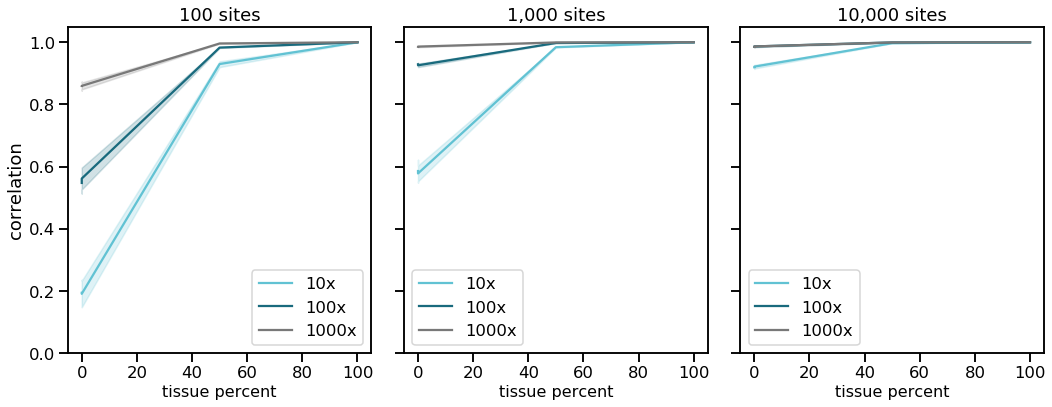

In [593]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,6))

sns.set_context("talk")

sns.lineplot(x="tissue", y="correlation", data=vary_perc_10x_50t_100_subset, label="10x", color="#61c2d3", ax=ax1)
sns.lineplot(x="tissue", y="correlation", data=vary_perc_100x_50t_100_subset, label="100x", color="#196a7d", ax=ax1)
sns.lineplot(x="tissue", y="correlation", data=vary_perc_1000x_50t_100_subset, label="1000x", color="#787878", ax=ax1)

sns.lineplot(x="tissue", y="correlation", data=vary_perc_10x_50t_subset, label="10x", color="#61c2d3", ax=ax2)
sns.lineplot(x="tissue", y="correlation", data=vary_perc_100x_50t_subset, label="100x", color="#196a7d", ax=ax2)
sns.lineplot(x="tissue", y="correlation", data=vary_perc_1000x_50t_subset, label="1000x", color="#787878", ax=ax2)

sns.lineplot(x="tissue", y="correlation", data=vary_perc_10x_50t_10000_subset, label="10x", color="#61c2d3", ax=ax3)
sns.lineplot(x="tissue", y="correlation", data=vary_perc_100x_50t_10000_subset, label="100x", color="#196a7d", ax=ax3)
sns.lineplot(x="tissue", y="correlation", data=vary_perc_100x_50t_10000_subset, label="1000x", color="#787878", ax=ax3)

# ax1.set(xscale="log")
# ax2.set(xscale="log")
# ax3.set(xscale="log")

ax1.set_xlabel("tissue percent", fontsize=16)
ax2.set_xlabel("tissue percent", fontsize=16)
ax3.set_xlabel("tissue percent", fontsize=16)

ax1.set_title("100 sites")
ax2.set_title("1,000 sites")
ax3.set_title("10,000 sites")


ax1.set_ylim(0, 1.05)

fig.tight_layout()


### 50 people, variable sites, variable depth, 10 other tissues


### Combine by individuals 

In [660]:
def load_gamma_corr(directory, parameter):
    """
    calculate the correlation between the true and estimated EM output from the pickle files 
    """
    
    est_files = glob.glob(directory + "/*" + parameter + "_est.pkl")
    df = pd.DataFrame(columns={"correlation", "individual", "rep"})

   
    for file in range(len(est_files)):
        
        ind = 0 
        i = 0 
        
        # load the files
        est_file = est_files[file]
        true_file = est_file.replace("est", "true")
        
        true = pkl.load(open(true_file, "rb"))
        est = pkl.load(open(est_file, "rb"))

        for t in range(est.shape[0]):
            corr = np.corrcoef(true[t, :], est[t, :])[0][1]  # calculate the correlation 
            df = df.append({"correlation":corr, "individual":str(ind), "rep":i}, ignore_index=True)
        
            if i<4:
                i += 1 
            else: 
                ind += 1 
                i = 0 
    
            
    return df

#### 1000 sites

In [599]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_10x_50per/"
vary_perc_10x_50per = load_gamma_corr(directory, "alpha")
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_100x_50per/"
vary_perc_100x_50per = load_gamma_corr(directory, "alpha")
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/siqmple_vary_perc_1000x_50per/"
vary_perc_1000x_50per = load_gamma_corr(directory, "alpha")

vary_perc_10x_50per = vary_perc_10x_50per.replace({"individual": percent_names})
vary_perc_100x_50per = vary_perc_100x_50per.replace({"individual": percent_names})
vary_perc_1000x_50per = vary_perc_1000x_50per.replace({"individual": percent_names})

#### 100 sites 

In [600]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_10x_100_50per/"
vary_perc_10x_100_50per = load_gamma_corr(directory, "alpha")
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_100x_100_50per/"
vary_perc_100x_100_50per = load_gamma_corr(directory, "alpha")
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_1000x_100_50per/"
vary_perc_1000x_100_50per = load_gamma_corr(directory, "alpha")

vary_perc_10x_100_50per = vary_perc_10x_100_50per.replace({"individual": percent_names})
vary_perc_100x_100_50per = vary_perc_100x_100_50per.replace({"individual": percent_names})
vary_perc_1000x_100_50per = vary_perc_1000x_100_50per.replace({"individual": percent_names})

#### 10,000 sites

In [601]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_10x_10000_50per/"
vary_perc_10x_10000_50per = load_gamma_corr(directory, "alpha")
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_100x_10000_50per/"
vary_perc_100x_10000_50per = load_gamma_corr(directory, "alpha")
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_1000x_10000_50per/"
vary_perc_1000x_10000_50per = load_gamma_corr(directory, "alpha")

vary_perc_10x_10000_50per = vary_perc_10x_10000_50per.replace({"individual": percent_names})
vary_perc_100x_10000_50per = vary_perc_100x_10000_50per.replace({"individual": percent_names})
vary_perc_1000x_10000_50per = vary_perc_1000x_10000_50per.replace({"individual": percent_names})

### Subset tissues

In [602]:
vary_perc_10x_50per_subset = vary_perc_10x_50per[vary_perc_10x_50per['individual'].isin([0, 0.001, 50, 100])]
vary_perc_100x_50per_subset = vary_perc_100x_50per[vary_perc_100x_50per['individual'].isin([0, 0.001, 50, 100])]
vary_perc_1000x_50per_subset = vary_perc_1000x_50per[vary_perc_1000x_50per['individual'].isin([0, 0.001, 50, 100])]

In [603]:
vary_perc_10x_50per_100_subset = vary_perc_10x_100_50per[vary_perc_10x_100_50per['individual'].isin([0, 0.001, 50, 100])]
vary_perc_100x_50per_100_subset = vary_perc_100x_100_50per[vary_perc_100x_100_50per['individual'].isin([0, 0.001, 50, 100])]
vary_perc_1000x_50per_100_subset = vary_perc_1000x_100_50per[vary_perc_1000x_100_50per['individual'].isin([0, 0.001, 50, 100])]

In [604]:
vary_perc_10x_50per_10000_subset = vary_perc_10x_10000_50per[vary_perc_10x_10000_50per['individual'].isin([0, 0.001, 50, 100])]
vary_perc_100x_50per_10000_subset = vary_perc_100x_10000_50per[vary_perc_100x_10000_50per['individual'].isin([0, 0.001, 50, 100])]
vary_perc_1000x_50per_10000_subset = vary_perc_1000x_10000_50per[vary_perc_1000x_10000_50per['individual'].isin([0, 0.001, 50, 100])]

### plot

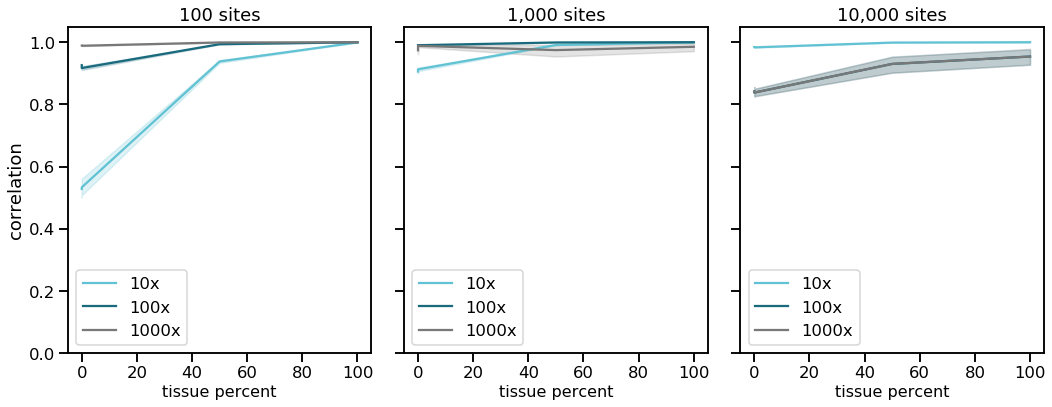

In [605]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,6))

sns.set_context("talk")

sns.lineplot(x="individual", y="correlation", data=vary_perc_10x_50per_100_subset, label="10x", color="#61c2d3", ax=ax1)
sns.lineplot(x="individual", y="correlation", data=vary_perc_100x_50per_100_subset, label="100x", color="#196a7d", ax=ax1)
sns.lineplot(x="individual", y="correlation", data=vary_perc_1000x_50per_100_subset, label="1000x", color="#787878", ax=ax1)

sns.lineplot(x="individual", y="correlation", data=vary_perc_10x_50per_subset, label="10x", color="#61c2d3", ax=ax2)
sns.lineplot(x="individual", y="correlation", data=vary_perc_100x_50per_subset, label="100x", color="#196a7d", ax=ax2)
sns.lineplot(x="individual", y="correlation", data=vary_perc_1000x_50per_subset, label="1000x", color="#787878", ax=ax2)

sns.lineplot(x="individual", y="correlation", data=vary_perc_10x_50per_10000_subset, label="10x", color="#61c2d3", ax=ax3)
sns.lineplot(x="individual", y="correlation", data=vary_perc_100x_50per_10000_subset, label="100x", color="#196a7d", ax=ax3)
sns.lineplot(x="individual", y="correlation", data=vary_perc_100x_50per_10000_subset, label="1000x", color="#787878", ax=ax3)

ax1.set_xlabel("tissue percent", fontsize=16)
ax2.set_xlabel("tissue percent", fontsize=16)
ax3.set_xlabel("tissue percent", fontsize=16)

ax1.set_title("100 sites")
ax2.set_title("1,000 sites")
ax3.set_title("10,000 sites")


ax1.set_ylim(0, 1.05)

fig.tight_layout()


## Unknown simulations, varying depth, site,  and number of people 

### 100 sites 

In [673]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_10x_100_50per_1unk/"
vary_perc_10x_100_50per_unk = load_gamma_corr(directory, "alpha")
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_100x_100_50per_1unk/"
vary_perc_100x_100_50per_unk = load_gamma_corr(directory, "alpha")
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_1000x_100_50per_1unk/"
vary_perc_1000x_100_50per_unk = load_gamma_corr(directory, "alpha")

vary_perc_10x_100_50per_unk = vary_perc_10x_100_50per_unk.replace({"individual": percent_names})
vary_perc_100x_100_50per_unk = vary_perc_100x_100_50per_unk.replace({"individual": percent_names})
vary_perc_1000x_100_50per_unk = vary_perc_1000x_100_50per_unk.replace({"individual": percent_names})

### 1000 sites 

In [674]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_10x_50per_1unk/"
vary_perc_10x_50per_unk = load_gamma_corr(directory, "alpha")
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_100x_50per_1unk/"
vary_perc_100x_50per_unk = load_gamma_corr(directory, "alpha")
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/siqmple_vary_perc_1000x_50per_1unk/"
vary_perc_1000x_50per_unk = load_gamma_corr(directory, "alpha")

vary_perc_10x_50per_unk = vary_perc_10x_50per_unk.replace({"individual": percent_names})
vary_perc_100x_50per_unk = vary_perc_100x_50per_unk.replace({"individual": percent_names})
vary_perc_1000x_50per_unk = vary_perc_1000x_50per_unk.replace({"individual": percent_names})

### 10000 sites

In [675]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_10x_10000_50per_1unk/"
vary_perc_10x_10000_50per_unk = load_gamma_corr(directory, "alpha")
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_100x_10000_50per_1unk/"
vary_perc_100x_10000_50per_unk = load_gamma_corr(directory, "alpha")
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_1000x_10000_50per_1unk/"
vary_perc_1000x_10000_50per_unk = load_gamma_corr(directory, "alpha")

vary_perc_10x_10000_50per_unk = vary_perc_10x_10000_50per_unk.replace({"individual": percent_names})
vary_perc_100x_10000_50per_unk = vary_perc_100x_10000_50per_unk.replace({"individual": percent_names})
vary_perc_1000x_10000_50per_unk = vary_perc_1000x_10000_50per_unk.replace({"individual": percent_names})

### Subset

In [679]:
vary_perc_10x_50per_unk_subset = vary_perc_10x_50per_unk[vary_perc_10x_50per_unk['individual'].isin([0, 0.001, 50, 100])]
vary_perc_100x_50per_unk_subset = vary_perc_100x_50per_unk[vary_perc_100x_50per_unk['individual'].isin([0, 0.001, 50, 100])]
vary_perc_1000x_50per_unk_subset = vary_perc_1000x_50per_unk[vary_perc_1000x_50per_unk['individual'].isin([0, 0.001, 50, 100])]

In [680]:
vary_perc_10x_100_50per_unk_subset = vary_perc_10x_100_50per_unk[vary_perc_10x_100_50per_unk['individual'].isin([0, 0.001, 50, 100])]
vary_perc_100x_100_50per_unk_subset = vary_perc_100x_100_50per_unk[vary_perc_100x_100_50per_unk['individual'].isin([0, 0.001, 50, 100])]
vary_perc_1000x_100_50per_unk_subset = vary_perc_1000x_100_50per_unk[vary_perc_1000x_100_50per_unk['individual'].isin([0, 0.001, 50, 100])]

In [681]:
vary_perc_10x_10000_50per_unk_subset = vary_perc_10x_10000_50per_unk[vary_perc_10x_10000_50per_unk['individual'].isin([0, 0.001, 50, 100])]
vary_perc_100x_10000_50per_unk_subset = vary_perc_100x_10000_50per_unk[vary_perc_100x_10000_50per_unk['individual'].isin([0, 0.001, 50, 100])]
vary_perc_1000x_10000_50per_unk_subset = vary_perc_1000x_10000_50per_unk[vary_perc_1000x_10000_50per_unk['individual'].isin([0, 0.001, 50, 100])]

### Plot 

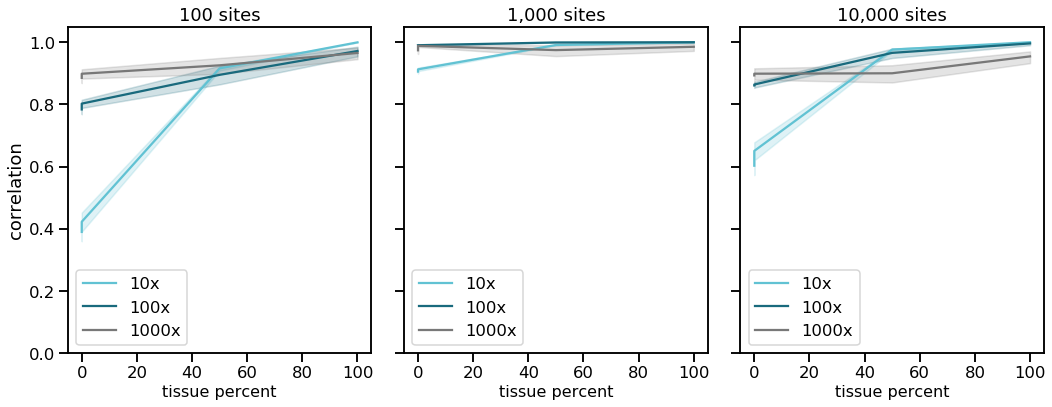

In [682]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,6))

sns.set_context("talk")

sns.lineplot(x="individual", y="correlation", data=vary_perc_10x_100_50per_unk_subset, label="10x", color="#61c2d3", ax=ax1)
sns.lineplot(x="individual", y="correlation", data=vary_perc_100x_100_50per_unk_subset, label="100x", color="#196a7d", ax=ax1)
sns.lineplot(x="individual", y="correlation", data=vary_perc_1000x_100_50per_unk_subset, label="1000x", color="#787878", ax=ax1)

sns.lineplot(x="individual", y="correlation", data=vary_perc_10x_50per_subset, label="10x", color="#61c2d3", ax=ax2)
sns.lineplot(x="individual", y="correlation", data=vary_perc_100x_50per_subset, label="100x", color="#196a7d", ax=ax2)
sns.lineplot(x="individual", y="correlation", data=vary_perc_1000x_50per_subset, label="1000x", color="#787878", ax=ax2)

sns.lineplot(x="individual", y="correlation", data=vary_perc_10x_10000_50per_unk_subset, label="10x", color="#61c2d3", ax=ax3)
sns.lineplot(x="individual", y="correlation", data=vary_perc_100x_10000_50per_unk_subset, label="100x", color="#196a7d", ax=ax3)
sns.lineplot(x="individual", y="correlation", data=vary_perc_1000x_10000_50per_unk_subset, label="1000x", color="#787878", ax=ax3)

ax1.set_xlabel("tissue percent", fontsize=16)
ax2.set_xlabel("tissue percent", fontsize=16)
ax3.set_xlabel("tissue percent", fontsize=16)

ax1.set_title("100 sites")
ax2.set_title("1,000 sites")
ax3.set_title("10,000 sites")


ax1.set_ylim(0, 1.05)

fig.tight_layout()


### individual

In [821]:
def load_gamma_corr(directory, parameter):
    """
    calculate the correlation between the true and estimated EM output from the pickle files 
    """
    
    est_files = glob.glob(directory + "/*" + parameter + "_est.pkl")
    df = pd.DataFrame(columns={"tissue", "correlation"})

    
    for file in range(len(est_files)):
        # load the files
        est_file = est_files[file]
        true_file = est_file.replace("est", "true")
        
        true = pkl.load(open(true_file, "rb"))
        est = pkl.load(open(est_file, "rb"))
        
        for t in range(est.shape[0]): 
            corr = np.corrcoef(true[t, :], est[t, :])[0][1]  # calculate the correlation 
            df = df.append({"tissue":str(t), "correlation":corr}, ignore_index=True)
    
    return df

### 10x

In [692]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_1unk_50_per_10x/"
fifty_per_10x_unk = load_pickles(directory, "alpha")
gamma_corr_10x_unk = load_gamma_corr(directory, "gamma")

### 100x

In [693]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_1unk_50_per_100x/"
fifty_per_100x_unk = load_pickles(directory, "alpha")
gamma_corr_100x_unk = load_gamma_corr(directory, "gamma")

### 1000x

In [694]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_1unk_50_per_1000x/"
fifty_per_1000x_unk = load_pickles(directory, "alpha")
gamma_corr_1000x_unk = load_gamma_corr(directory, "gamma")

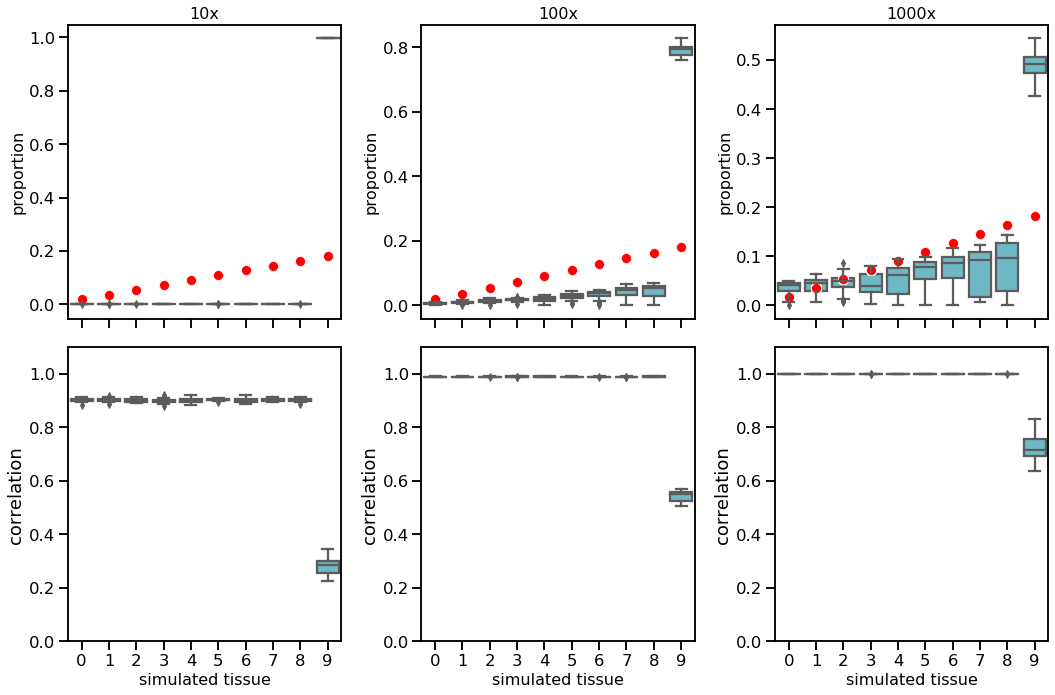

In [695]:
fig, ax = plt.subplots(ncols=3, nrows=2, sharex=True, figsize=(15,10))

sns.set_context("talk")

sns.boxplot("tissue", "estimate", data = fifty_per_10x_unk, color="#61c2d3", ax=ax[0,0])
sns.scatterplot("tissue", "truth", data = fifty_per_10x_unk, color="red", s=100, ax=ax[0,0])
sns.boxplot("tissue", "correlation", data=gamma_corr_10x_unk, color="#61c2d3", ax=ax[1,0])

sns.boxplot("tissue", "estimate", data = fifty_per_100x_unk, color="#61c2d3", ax=ax[0,1])
sns.scatterplot("tissue", "truth", data = fifty_per_100x_unk, color="red", s=100, ax=ax[0,1])
sns.boxplot("tissue", "correlation", data=gamma_corr_100x_unk, color="#61c2d3", ax=ax[1,1])

sns.boxplot("tissue", "estimate", data = fifty_per_1000x_unk, color="#61c2d3", ax=ax[0,2])
sns.scatterplot("tissue", "truth", data = fifty_per_1000x_unk, color="red", s=100, ax=ax[0,2])
sns.boxplot("tissue", "correlation", data=gamma_corr_1000x_unk, color="#61c2d3", ax=ax[1,2])

ax[1, 0].set_xlabel("simulated tissue", fontsize=16)
ax[1, 1].set_xlabel("simulated tissue", fontsize=16)
ax[1, 2].set_xlabel("simulated tissue", fontsize=16)

ax[0, 0].set_ylabel("proportion", fontsize=16)
ax[0, 1].set_ylabel("proportion", fontsize=16)
ax[0, 2].set_ylabel("proportion", fontsize=16)

ax[1, 0].set_ylim(0, 1.1)
ax[1, 1].set_ylim(0, 1.1)
ax[1, 2].set_ylim(0, 1.1)

ax[0, 0].set_title("10x", fontsize=16)
ax[0, 1].set_title("100x", fontsize=16)
ax[0, 2].set_title("1000x", fontsize=16)


fig.tight_layout()


## Unknown vs number of people, overall

### 1 unk 

In [822]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/unk1_1per/"
unk1_1per = load_pickles(directory, "alpha")

In [823]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/unk1_10per/"
unk1_10per = load_pickles(directory, "alpha")

In [824]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/unk1_100per/"
unk1_100per = load_pickles(directory, "alpha")

In [825]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/unk1_500per/"
unk1_500per = load_pickles(directory, "alpha")

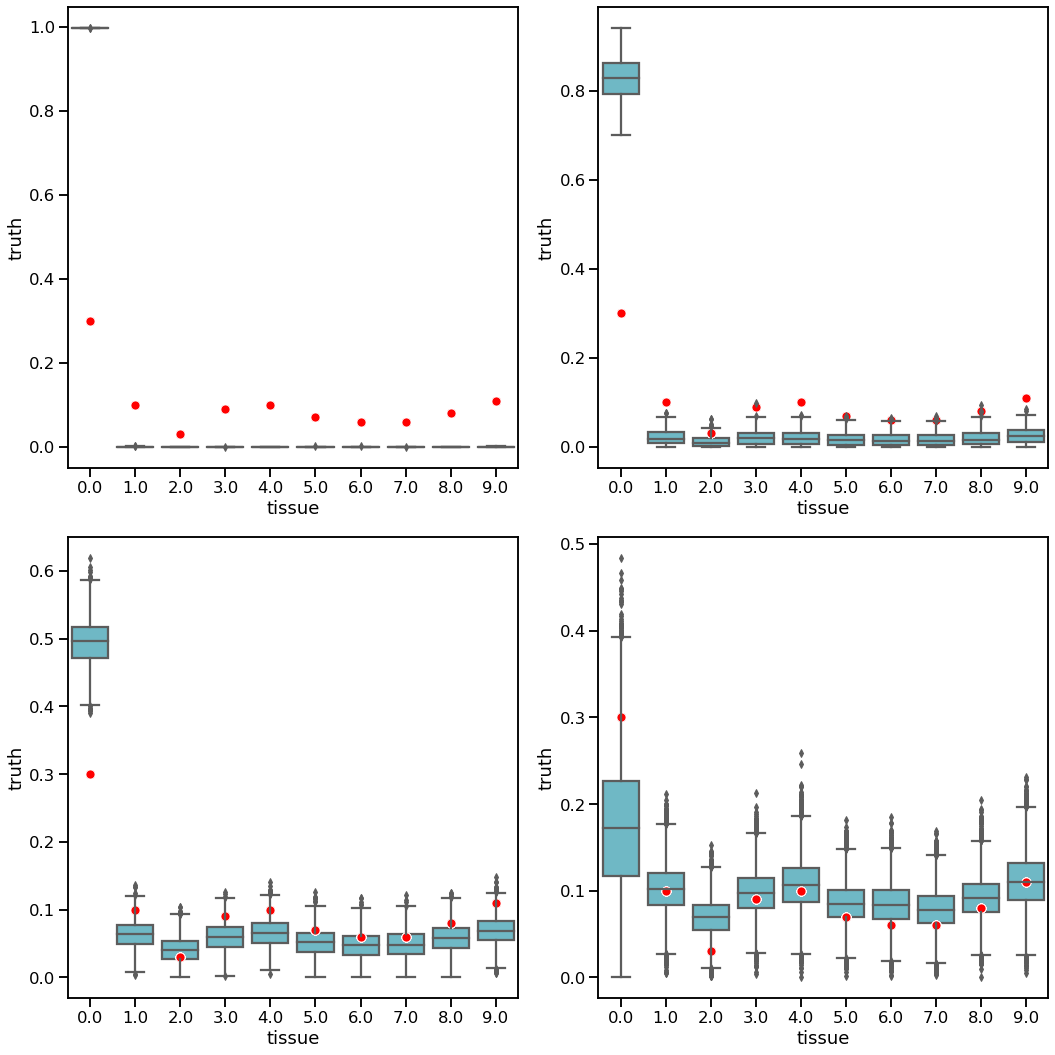

In [839]:
fig, ax = plt.subplots(ncols=2, nrows=2, sharey=False, figsize=(15,15))

sns.set_context("talk")

sns.boxplot("tissue", "estimate", data = unk1_1per, color="#61c2d3", ax=ax[0, 0])
sns.scatterplot("tissue", "truth", data = unk1_1per, color="red", ax=ax[0, 0] )

sns.boxplot("tissue", "estimate", data = unk1_10per, color="#61c2d3", ax=ax[0, 1])
sns.scatterplot("tissue", "truth", data = unk1_1per, color="red", ax=ax[0, 1] )

sns.boxplot("tissue", "estimate", data = unk1_100per, color="#61c2d3", ax=ax[1, 0])
sns.scatterplot("tissue", "truth", data = unk1_100per, color="red", ax=ax[1, 0] )

sns.boxplot("tissue", "estimate", data = unk1_500per, color="#61c2d3", ax=ax[1, 1])
sns.scatterplot("tissue", "truth", data = unk1_500per, color="red", ax=ax[1, 1] )

# ax1.set_xlabel("simulated tissue", fontsize=16)
# ax2.set_xlabel("simulated tissue", fontsize=16)
# ax1.set_ylabel("estimated proportion", fontsize=16)
# ax1.set_title("α")
# ax2.set_title("β")

ax2.set_ylim(0, 1)

fig.tight_layout()


### 2unk

In [49]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/unk2_1per/"
unk2_1per = load_pickles(directory, "alpha")

In [50]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/unk2_10per/"
unk2_10per = load_pickles(directory, "alpha")

In [51]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/unk2_100per/"
unk2_100per = load_pickles(directory, "alpha")

In [52]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/unk2_500per/"
unk2_500per = load_pickles(directory, "alpha")

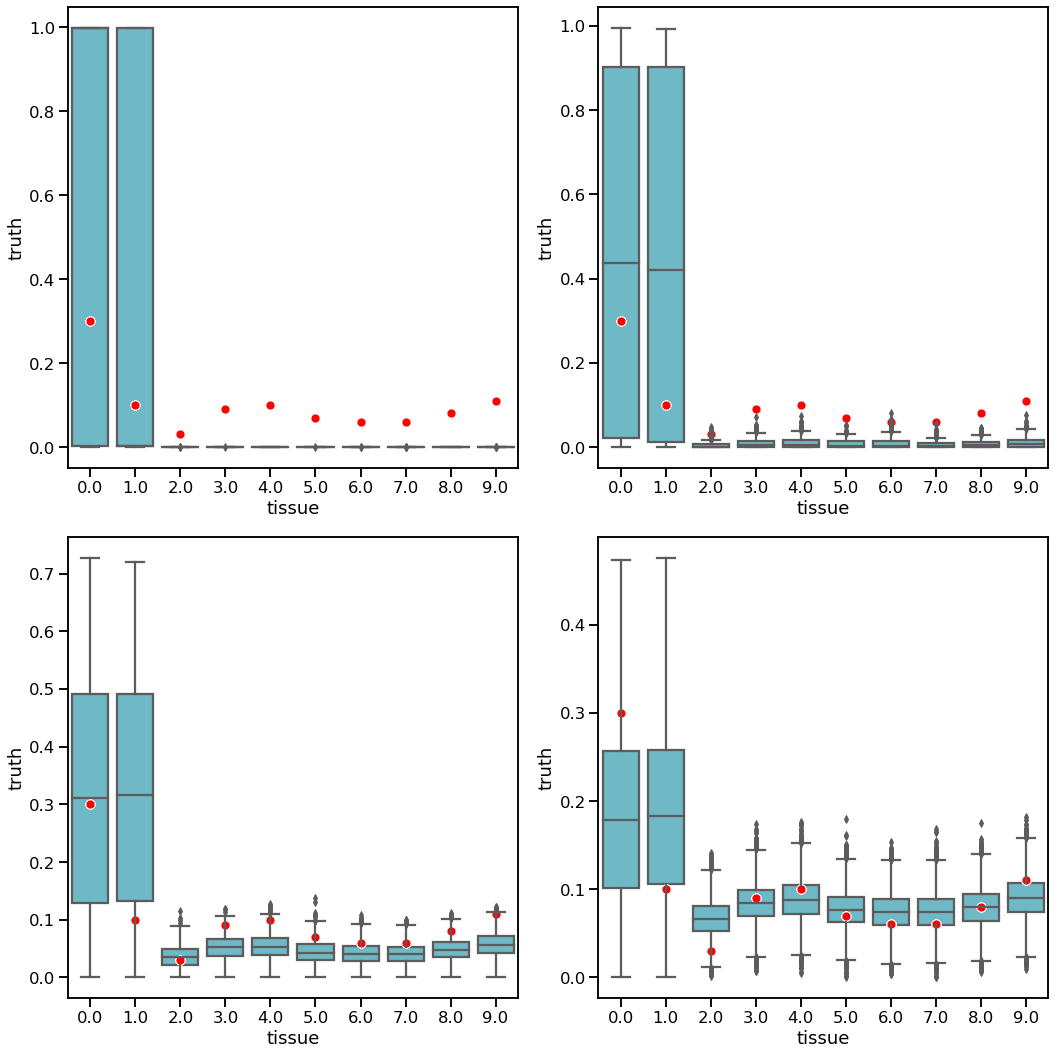

In [54]:
fig, ax = plt.subplots(ncols=2, nrows=2, sharey=False, figsize=(15,15))

sns.set_context("talk")

sns.boxplot("tissue", "estimate", data = unk2_1per, color="#61c2d3", ax=ax[0, 0])
sns.scatterplot("tissue", "truth", data = unk2_1per, color="red", ax=ax[0, 0] )

sns.boxplot("tissue", "estimate", data = unk2_10per, color="#61c2d3", ax=ax[0, 1])
sns.scatterplot("tissue", "truth", data = unk2_1per, color="red", ax=ax[0, 1] )

sns.boxplot("tissue", "estimate", data = unk2_100per, color="#61c2d3", ax=ax[1, 0])
sns.scatterplot("tissue", "truth", data = unk2_100per, color="red", ax=ax[1, 0] )

sns.boxplot("tissue", "estimate", data = unk2_500per, color="#61c2d3", ax=ax[1, 1])
sns.scatterplot("tissue", "truth", data = unk2_500per, color="red", ax=ax[1, 1] )

# ax1.set_xlabel("simulated tissue", fontsize=16)
# ax2.set_xlabel("simulated tissue", fontsize=16)
# ax1.set_ylabel("estimated proportion", fontsize=16)
# ax1.set_title("α")
# ax2.set_title("β")

# ax2.set_ylim(0, 1)

fig.tight_layout()


## Unknown mse vs number of people 

In [282]:
def load_gamma_1_unk_mse(directories, people, parameter):
    """
    calculate the correlation between the true and estimated EM output from the pickle files 
    """
    
    df = pd.DataFrame(columns={"rms", "people", "rep"})

    for i, directory in enumerate(directories):
        est_files = glob.glob(directory + "/*" + parameter + "_est.pkl")
        true_vector = np.empty(shape=(1, len(est_files)))
        est_vector = np.empty(shape=(1, len(est_files)))
        
        for file in range(len(est_files)):
            est_file = est_files[file]
            true_file = est_file.replace("est", "true")

            true = pkl.load(open(true_file, "rb"))
            est = pkl.load(open(est_file, "rb"))
            
            true_vector[0, file] = true[0, 0]
            est_vector[0, file] = est[0, 0]
        
        mse = sqrt(mean_squared_error(true_vector, est_vector))
        df = df.append({"rms":mse, "people":people[i]}, ignore_index=True)

    return df

In [283]:
import os 
os.chdir("/Users/christacaggiano/Desktop/zaitlen_lab_desktop/")

### 1 unk 

In [284]:
directories = ["unk1_1per", "unk1_5per", "unk1_10per", "unk1_50per", "unk1_100per", "unk1_500per"]
people = [1, 5, 10, 50, 100, 500]

In [285]:
unk1_people = load_gamma_1_unk_mse(directories, people, "alpha")

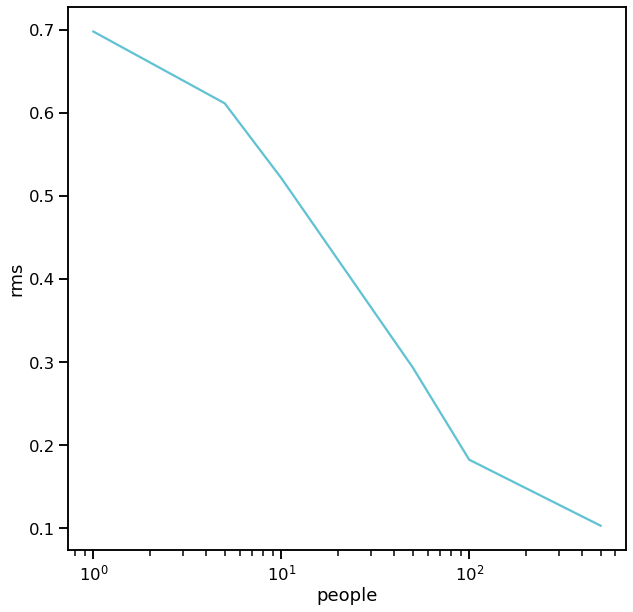

In [287]:
plt.figure(figsize=(10, 10))

sns.set_context("talk")
sns.lineplot(x="people", y="rms", data=unk1_people, color="#61c2d3")

plt.xscale("log")


### 2 unk

In [292]:
def load_gamma_2_unk_mse(directories, people, parameter):
    """
    calculate the correlation between the true and estimated EM output from the pickle files 
    """
    
    df1 = pd.DataFrame(columns={"rms", "people", "rep"})
    df2 = pd.DataFrame(columns={"rms", "people", "rep"})

    for i, directory in enumerate(directories):
        est_files = glob.glob(directory + "/*" + parameter + "_est.pkl")
        true_vector1 = np.empty(shape=(1, len(est_files)))
        est_vector1 = np.empty(shape=(1, len(est_files)))
        
        true_vector2 = np.empty(shape=(1, len(est_files)))
        est_vector2 = np.empty(shape=(1, len(est_files)))
        
        for file in range(len(est_files)):
            est_file = est_files[file]
            true_file = est_file.replace("est", "true")

            true = pkl.load(open(true_file, "rb"))
            est = pkl.load(open(est_file, "rb"))
                
            true1 = true[0, 0]
            true2 = true[0, 1]
            
            true_vector1[0, file] = true1
            true_vector2[0, file] = true2
            
            
            unk1 = est[0, 0]
            unk2 = est[0, 1]
            
            if abs(true1-unk1) < abs(true2-unk1):                 
                est_vector1[0, file] = unk1
                est_vector2[0, file] = unk2
            else: 
                est_vector1[0, file] = unk2
                est_vector2[0, file] = unk1
        
        mse1 = sqrt(mean_squared_error(true_vector1, est_vector1))
        df1 = df1.append({"rms":mse1, "people":people[i]}, ignore_index=True)
            
        mse2 = sqrt(mean_squared_error(true_vector2, est_vector2))
        df2 = df2.append({"rms":mse2, "people":people[i]}, ignore_index=True)

    return df1, df2

In [293]:
directories = ["unk2_1per", "unk2_5per", "unk2_10per", "unk2_50per", "unk2_100per", "unk2_500per"]
people = [1, 5, 10, 50, 100, 500]

In [294]:
unk2_people1, unk2_people2  = load_gamma_2_unk_mse(directories, people, "alpha")

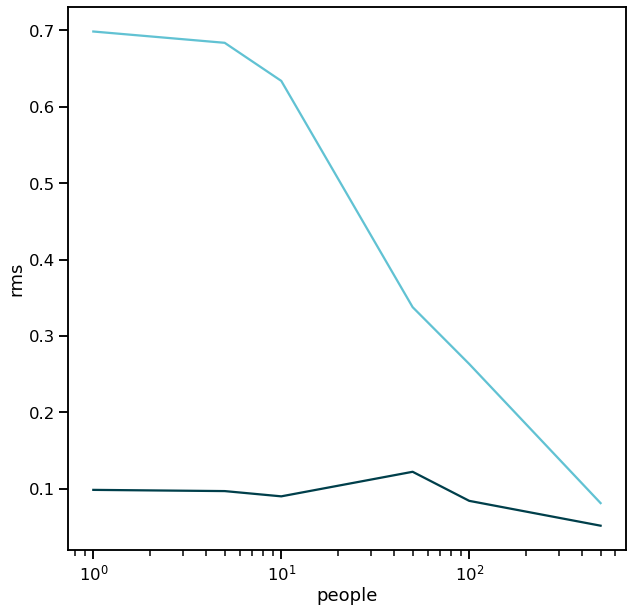

In [296]:
plt.figure(figsize=(10, 10))

sns.set_context("talk")
sns.lineplot(x="people", y="rms", data=unk2_people1, color="#61c2d3")
sns.lineplot(x="people", y="rms", data=unk2_people2, color="#003f4b")

plt.xscale("log")


[None]

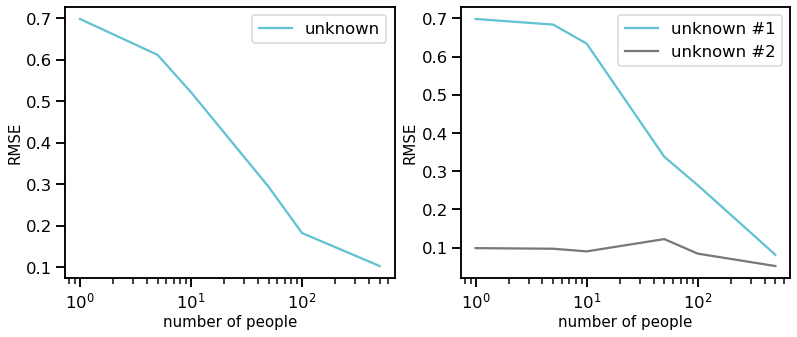

In [303]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(13,5))

sns.set_context("talk")
sns.lineplot(x="people", y="rms", data=unk2_people1, color="#61c2d3", ax=ax2, label="unknown #1")
sns.lineplot(x="people", y="rms", data=unk2_people2, color="#787878", ax=ax2, label="unknown #2")

sns.lineplot(x="people", y="rms", data=unk1_people, color="#61c2d3", ax=ax1, label="unknown")

ax1.set_ylabel("RMSE", fontsize=15)
ax2.set_ylabel("RMSE", fontsize=15)

ax1.set_xlabel("number of people", fontsize=15)
ax2.set_xlabel("number of people", fontsize=15)

ax1.set(xscale="log")
ax2.set(xscale="log")
